# Operadores de mutación

## Mutantes a mano

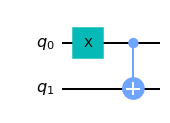

In [3]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.x(0)
qc.cx(0,1)
#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')


In [6]:
from qiskit import QuantumCircuit, Aer, assemble

import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

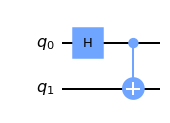

In [7]:
# Aplicar operador de mutación que cambie la puerta x por la puerta h
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

In [8]:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

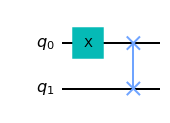

In [9]:
# Aplicar operador de mutación que cambie la puerta cnot por la puerta swap
qc = QuantumCircuit(2)
qc.x(0)
qc.swap(0,1)
#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

In [10]:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

# Operadores de mutación en qiskit

### Importamos las puertas que usa qiskit

In [12]:
from qiskit.circuit.library import HGate, SwapGate
from qiskit.circuit.library.standard_gates import (
    IGate,
    U1Gate,
    U2Gate,
    U3Gate,
    XGate,
    YGate,
    ZGate,
    HGate,
    SGate,
    SdgGate,
    TGate,
    TdgGate,
    RXGate,
    RYGate,
    RZGate,
    CXGate,
    CYGate,
    CZGate,
    CHGate,
    CRZGate,
    CU1Gate,
    CU3Gate,
    SwapGate,
    RZZGate,
    CCXGate,
    CSwapGate,
)
#Primer tipo de operador, cambiar puertas consecutivas de orden, cambiando tambien el circuito

one_q_ops = [
        IGate,
        U1Gate,
        U2Gate,
        U3Gate,
        XGate,
        YGate,
        ZGate,
        HGate,
        SGate,
        SdgGate,
        TGate,
        TdgGate,    
        RXGate,
        RYGate,
        RZGate,
    ]
one_param = [U1Gate, RXGate, RYGate, RZGate, RZZGate, CU1Gate, CRZGate]
two_param = [U2Gate]
three_param = [U3Gate, CU3Gate]
two_q_ops = [CXGate, CYGate, CZGate, CHGate, CRZGate, CU1Gate, CU3Gate, SwapGate, RZZGate]
three_q_ops = [CCXGate, CSwapGate]

### Funciones auxiliares

In [14]:
from qiskit.circuit import Instruction
import random
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram 





def change(ls,q1,q2):
    if q1 in ls:
        index = ls.index(q1)
        ls[index]=q2
    return ls
        

def replace(circ, origin, instruction: Instruction):
    circ._data = [(instruction, _inst[1], _inst[2]) if _inst[0] == origin  else _inst for _inst in circ._data]
def replace_target_qubit(circ,origin,target_qubit,final_qubit):
    circ._data = [(_inst[0], change(_inst[1],target_qubit,final_qubit), _inst[2]) if _inst[0] == origin  else _inst for _inst in circ._data]
def replace_target_clbit(circ,origin,target_clbit,final_clbit):
    circ._data = [(_inst[0], _inst[1], change(_inst[2],target_clbit,final_clbit)) if _inst[0] == origin  else _inst for _inst in circ._data]

### Operador 1: gate_mutant

In [19]:
def gate_mutant(circ1,input_gate=None,output_gate=None):
    """
    

    Parameters
    ----------
    circ1 : QuantumCircuit
    input_gate : Instruction
    output_gate : Instruction
        
    Description
    -----------
    Intercambia input_gate por output_gate en circ1, si no se especifica alguna de las dos, se toma de manera aleatoria.

    Returns
    -------
    circ : QuantumCircuit
        Mutant

    """
    circ = circ1.copy()
    if input_gate is None:
        n = len(circ.data)
        i=0
        num_clbits=-1
        while num_clbits!=0 and i<n:
            r = random.randint(0, n-1)
            inst = circ.data[r]
            input_gate=inst[0]
            num_clbits = input_gate.num_clbits
            i+=1
    if output_gate is None:
        """
        Si no le decimos lo contrario, cambia puertas que afectan a la misma cantidad de bits
        """
        num_qubits=input_gate.num_qubits
        if num_qubits==1:
            GATE = one_q_ops[random.randint(0, len(one_q_ops)-1)]
        elif num_qubits==2:
            GATE = two_q_ops[random.randint(0, len(two_q_ops)-1)]
        elif num_qubits==3:
            GATE = three_q_ops[random.randint(0, len(three_q_ops)-1)]
        if GATE in one_param:
            p = random.uniform(0, 2*np.pi)
            output_gate = GATE(p)
        elif GATE in two_param:
            p1 = random.uniform(0, 2*np.pi)
            p2 = random.uniform(0, 2*np.pi)
            output_gate = GATE(p1,p2)
        elif GATE in three_param:
            p1=random.uniform(0, 2*np.pi)
            p2=random.uniform(0, 2*np.pi)
            p3=random.uniform(0, 2*np.pi)
            output_gate = GATE(p1,p2,p3)
        else:
            output_gate = GATE()     
    replace(circ,input_gate,output_gate)
    print('Se reemplaza la puerta ',input_gate.name,' por la puerta ',output_gate.name)
    return circ

### Operador 2: targetqubit_mutant


In [21]:
def targetqubit_mutant(circ1,gate=None,target_qubit=None,final_qubit=None):
    """
    

    Parameters
    ----------
    circ1 : QuantumCircuit
    gate : Instruction
    target_qubit : Qubit
    final_qubit : Quibit

    Description
    -----------
    Intercambia, en gate, target_qubit por final_qubit. Los parámetros no especificados se seleccionan de manera aleatoria

    Returns
    -------
    circ : QuantumCircuit
        Mutant

    """
    circ = circ1.copy()
    if gate is None:
        n = len(circ.qubits)
        if n<3:
            raise Exception('Impossible to change target qubits for any gate as there are less than 3 qubits')
        else:
            i=0
            num_qubits=0
            while num_qubits<2 and i<n:  
                r = random.randint(0, n-1)
                inst = circ.data[r]
                num_qubits = inst[0].num_qubits
                i+=1
                gate=inst[0]            
    if gate.num_qubits<2:
        raise Exception('Could not find multi qubit gates, change the circuit or try again')
    else:
        if target_qubit is None:
            target_qubit = inst[1][random.randint(0, len(inst[1])-1)]
        if final_qubit is None:
            final_qubit = circ.qubits[random.randint(0,len(circ.qubits)-1)]
        replace_target_qubit(circ, gate, target_qubit, final_qubit)
    print('Se han cambiado los qubits a los que afecta la puerta ',gate.name)
    return circ
        

### Operador 3: targetclbit_mutant

In [22]:
def targetclbit_mutant(circ1,gate=None,target_clbit=None,final_clbit=None):
    """
    

    Parameters
    ----------
    circ1 : QuantumCircuit
    gate : Instruction
    target_clbit : Clbit
    final_clbit : Clbit


    Description
    -----------
    Intercambia, en gate, target_clbit por final_clbit. Los parámetros no especificados se seleccionan de manera aleatoria


    Returns
    -------
    circ : QuantumCircuit
        Mutant

    """
    circ = circ1.copy()
    if gate is None:
        n = len(circ.data)
        if len(circ.clbits)<2:
            raise Exception('Impossible to change target clbits as there are less than 2')
        else:
            i=0
            num_clbits=0
            while num_clbits==0 and i<n:  
                r = random.randint(0, n-1)
                inst = circ.data[r]
                num_clbits = inst[0].num_clbits
                i+=1
                gate=inst[0]
    if gate.num_clbits==0:
        raise Exception('Could not find gates with classical bits or meaurements, change the circuit or try again')
    else:
        if target_clbit is None:
            target_clbit = inst[2][random.randint(0, len(inst[2])-1)]
        if final_clbit is None:
            final_clbit = circ.clbits[random.randint(0,len(circ.clbits)-1)]
        replace_target_clbit(circ, gate, target_clbit, final_clbit)
    print('Se ha cambiado los bits clásicos afectados')
    return circ

### Operador 4: measure_mutant

In [23]:
def measure_mutant(circ1,target_qubit=None,final_qubit=None):
    """
    

    Parameters
    ----------
    circ1 : TQuantumCircuit 
    target_qubit : Qubit
    final_qubit : Qubit

    Description
    -----------
    Intercambia, en una medición, target_qubit por final_qubit. Los parámetros no especificados se seleccionan de manera aleatoria

    
    Returns
    -------
    circ : QuantumCircuit
        Mutant
    """
    circ=circ1.copy()
    n=len(circ.data)
    if len(circ.clbits)<2:
        raise Exception('Impossible to change target clbits as there are less than 2')
    if target_qubit is None:
        i=0
        found=False
        while i<n and not found:
            r = random.randint(0, n-1)
            inst = circ.data[r]
            if inst[0].name=='measure':
                found=True
            i+=1
            gate=inst[0]
        target_qubit=inst[1][0]
    else:
        found=False
        i=0
        while not found and i<n:
            inst = circ.data[i]
            if inst[0]=='measure' and target_qubit in inst[1]:
                found=True
            gate=inst[0]
            i+=1
    if gate.name != 'measure':
        raise Exception('Could not find measurement gate, change the circuit or try again')
    if final_qubit is None:
        final_qubit = circ.qubits[random.randint(0,len(circ.qubits)-1)]
    print('Se cambia el qubit al que afecta la medición')
    replace_target_qubit(circ, gate, target_qubit, final_qubit)
    return circ

### Operador de operadores


In [24]:
def mutant(circ,gate=True,target_qubit=True,target_clbit=True,measure=True):
    """
    

    Parameters
    ----------
    circ : QuantumCircuit
    gate : bool
    target_qubit : bool
    target_clbit : bool
    measure : bool
        Indica si se quiere dar la opción de usar al operador measure

    
    Description
    -----------
    Garantiza que devuelve un mutante del circuito original de manera aleatoria seleccionando unos de los cuatro operadores, si se indica que alguno de los tres es falso, no se generará el mutante usando ese operador


    Returns
    -------
    result : QuantumCircuit
        Mutant

    

    """
    
    r = random.randint(1, 4)
    if r==1 and gate:
        result = gate_mutant(circ)
    elif r==2 and target_qubit:
        result = targetqubit_mutant(circ)
    elif r==3 and target_clbit:
        result = targetclbit_mutant(circ)
    elif measure:
        result = measure_mutant(circ)
    if result == circ:
        result = mutant(circ,gate,target_qubit,target_clbit,measure)
    return result

In [25]:
# Ahora hacemos que sean métodos para QuantumCircuit
QuantumCircuit.mutant = mutant
QuantumCircuit.gate_mutant = gate_mutant
QuantumCircuit.targetqubit_mutant = targetqubit_mutant
QuantumCircuit.targetclbit_mutant = targetclbit_mutant
QuantumCircuit.measure_mutant = measure_mutant

# Ejemplos de uso

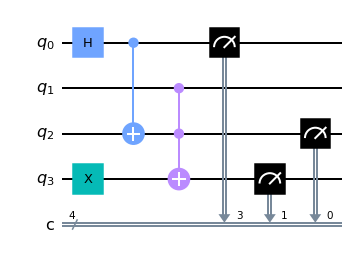

In [28]:
#Creamos un circuito para mutarlo
qc = QuantumCircuit(4,4)
qc.h(0)
qc.x(3)
qc.cx(0,2)
qc.ccx(1,2,3)
qc.measure([0,3,2],[3,1,0])
#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

Se reemplaza la puerta  ccx  por la puerta  ccx
Se reemplaza la puerta  h  por la puerta  x


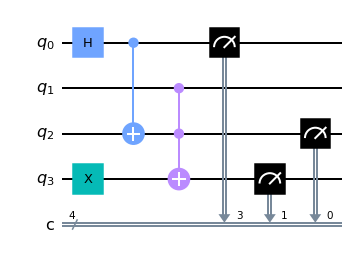

In [29]:
# Operador 1
qc.gate_mutant()#Esto nos devolverá el cambio de cualquier puerta por cualquier otra

#Cambiamos particularmente la puerta H por la puerta X
qc.gate_mutant(HGate(),XGate())
qc.draw(output='mpl')

In [30]:
# Por ejemplo, podemos crear una lista de mutantes dada una lista de puertas
puertas = [XGate(),SdgGate(),ZGate(),YGate()]
mutantes = [qc.gate_mutant(HGate(),puerta) for puerta in puertas]
mutantes

Se reemplaza la puerta  h  por la puerta  x
Se reemplaza la puerta  h  por la puerta  sdg
Se reemplaza la puerta  h  por la puerta  z
Se reemplaza la puerta  h  por la puerta  y


Se han cambiado los qubits a los que afecta la puerta  cx


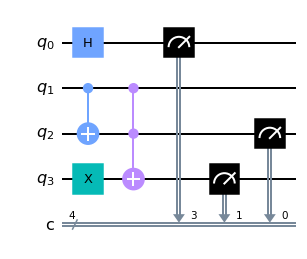

In [31]:
qc.targetqubit_mutant().draw(output='mpl')

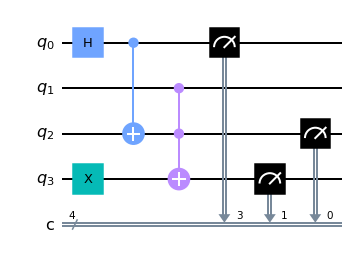

In [32]:
qc.draw(output='mpl')
#El anterior mutante ha cambiado el qubit de control en la puerta cx

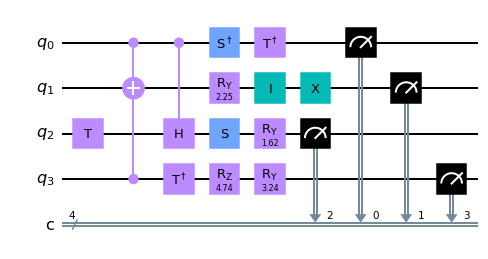

In [33]:
from qiskit.circuit.random import random_circuit

circ = random_circuit(4, 4, measure=True)
circ.draw(output='mpl')

Se ha cambiado los bits clásicos afectados


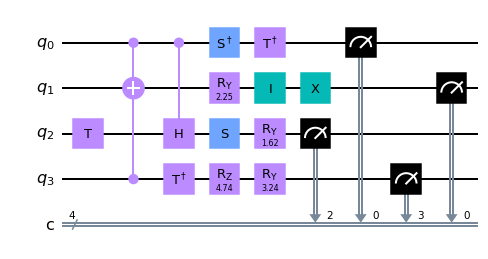

In [34]:
c1 = circ.mutant()
#print(c1.draw(output='latex_source'))
c1.draw(output='mpl')

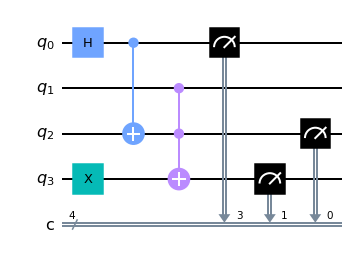

In [35]:
#Creamos un circuito para mutarlo
qc = QuantumCircuit(4,4)
qc.h(0)
qc.x(3)
qc.cx(0,2)
qc.ccx(1,2,3)
qc.measure([0,3,2],[3,1,0])
#print(qc.draw(output='latex_source'))
qc.draw(output='mpl')

In [36]:
#Ahora creamos tres mutantes del circuito
m1 = qc.gate_mutant(HGate(),SdgGate())
m2 = qc.targetqubit_mutant(CXGate(),qc.qubits[0],qc.qubits[1])
m3 = qc.measure_mutant(qc.qubits[0],qc.qubits[1])

Se reemplaza la puerta  h  por la puerta  sdg
Se han cambiado los qubits a los que afecta la puerta  cx
Se cambia el qubit al que afecta la medición


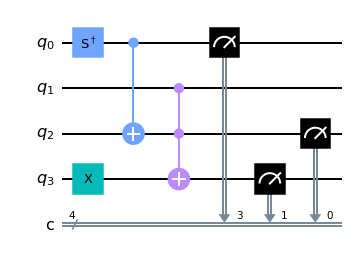

In [37]:
#print(m1.draw(output='latex_source'))
m1.draw(output='mpl')

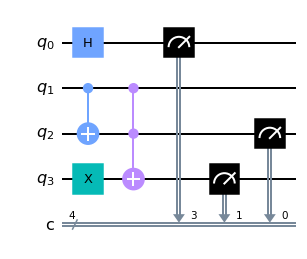

In [39]:
#print(m2.draw(output='latex_source'))
m2.draw(output='mpl')

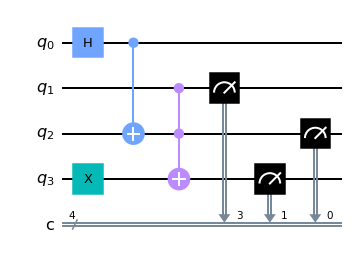

In [41]:
#print(m3.draw(output='latex_source'))
m3.draw(output='mpl')

# Ejemplo de metamorphic testing

In [46]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

simulator = QasmSimulator()
    


def circuito_suma(n):
    qc = QuantumCircuit(3*n,n)
    for i in range(n-1):
        qc.barrier()
        qc.ccx(i,i+2*n,i+2*n+1)
        qc.cx(i,i+2*n)
        qc.ccx(i+n,i+2*n,i+2*n+1)
        qc.cx(i+n,i+2*n)
    qc.barrier()
    qc.cx(n-1,3*n-1)
    qc.cx(2*n-1,3*n-1)
    for i in range(n):
        qc.measure(2*n+i,i)
    return qc
def suma_bits(n,st1,st2):
    qc = QuantumCircuit(3*n,n)
    i = n-1
    for c in st1:
        if c=='1':
            qc.x(i)
        i-=1
    i=2*n-1
    for c in st2:
        if c=='1':
            qc.x(i)
        i-=1
    result = qc.compose(circuito_suma(n))
    return result
def suma_modular(a,b):
    aux = max(a,b)
    m = min(a,b)
    a=aux
    b=m
    a = "{0:b}".format(a)
    b = "{0:b}".format(b)
    if (len(a)>len(b)):
        r = len(a)-len(b)
        st = '0'*r
        b=st+b
    qc = suma_bits(len(a),a,b)
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit)
    result = job.result()
    counts = result.get_counts(compiled_circuit)
    print(qc.draw())
    print('El resultado de la suma en binario de ',a,'+',b, 'es: ',counts)
    return qc

In [47]:
#Ejemplo de la regla metamórfica
qc=suma_bits(5,'10101','10100')
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit,shots=10)
result = job.result()
counts1 = result.get_counts(compiled_circuit)
print(counts1)

qc=suma_bits(5,'10100','10101')
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit,shots=10)
result = job.result()
counts2 = result.get_counts(compiled_circuit)
print(counts2)
counts1 == counts2

{'01001': 10}
{'01001': 10}


True

In [48]:
import random
# Usaremos esta función para crear un conjunto test 
def rand_key(p):
   
    # Variable to store the
    # string
    key1 = ""
 
    # Loop to find the string
    # of desired length
    for i in range(p):
         
        # randint function to generate
        # 0, 1 randomly and converting
        # the result into str
        temp = str(random.randint(0, 1))
 
        # Concatenation the random 0, 1
        # to the final result
        key1 += temp
         
    return(key1)

n = 5
test = [rand_key(n) for i in range(100)]

In [49]:
import functools
import operator


l=[None]*(len(test)-1)
for i in range(len(test)-1):

    qc1 = suma_bits(n,test[i],test[i+1])
    qc2 = suma_bits(n,test[i+1],test[i])
    
    compiled_circuit = transpile(qc1, simulator)
    job = simulator.run(compiled_circuit,shots=10)
    result = job.result()
    counts1 = result.get_counts(compiled_circuit)
    
    
    compiled_circuit = transpile(qc2, simulator)
    job = simulator.run(compiled_circuit,shots=10)
    result = job.result()
    counts2 = result.get_counts(compiled_circuit)
    
    
    l[i]=counts1==counts2

if not (False in l):
    print('Test superado con éxito')

Test superado con éxito
